# Customer Churn Dataset Analysis
This notebook is to clean the dataset, I will use missingno package with other python data analysis packages to clean and transform the dataset.

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
#load datasets
description = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
data = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [3]:
#print out the first five rows of the data
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
#print the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Missing Values
In the last notebook(Exploratory Data Analysis), I discovered that there are missing values in the dataset and I said that they will be handled in this notebook.\
I will use the **missingno** library to visualize the missing values and the type of missingness to determine how they will be handled

In [5]:
#count the number of missing values across each columns
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
#count the total number of missing values in the dataset
data.isnull().sum().sum()

1856

In [7]:
#count the number of rows with missing values
data[data.isnull().sum(axis=1) != 0].shape

(1856, 20)

In total there are 1856 missing values, and there are also 1856 rows with missing values, meaning that each of the missing value is on a different row, and no row has more than one missing value.\
So if we drop all the rows with missing values we would be dropping 1856 rows that is 32.97 percent of the dataset and will cause a data loss

In [8]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### Plot the missing values in all columns, using missingness matrix

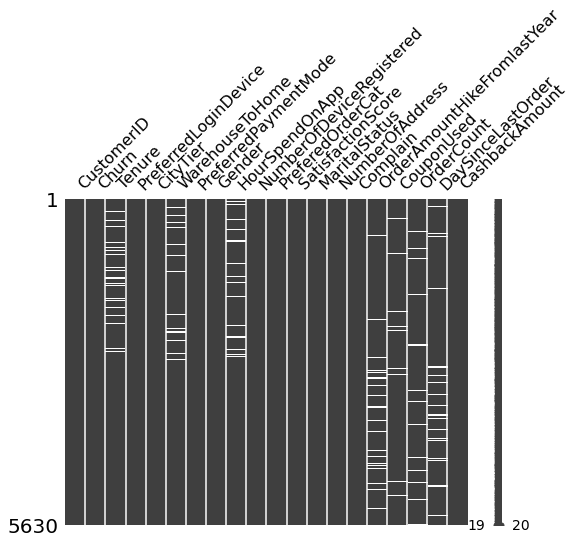

In [9]:
msno.matrix(data, figsize=(8,6))
plt.show()

### Identifying missingness type by Identifying relationship between missing values and observed value
Looking at the missingness matrix above the missing values do not follow any pattern, they are **missing completely at random(MCAR)**, I will sort the data to uncover some relationship between missingness type.\
After sorting the data by all the columns, I found that sorting by the CashbackAmount columns creates a pattern between the missing values and the CashbackAmount columns, which identifies the missingness as **missing at random(MAR)**

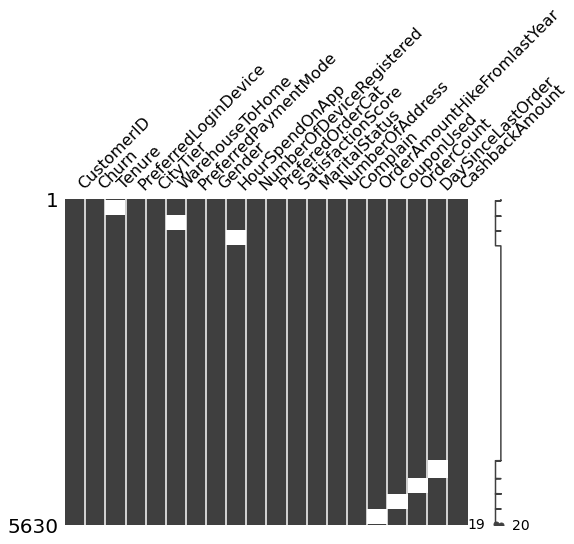

In [10]:
msno.matrix(data.sort_values(by='CashbackAmount'), figsize=(8,6))
plt.show()

### Identifying relationships between missing values in columns

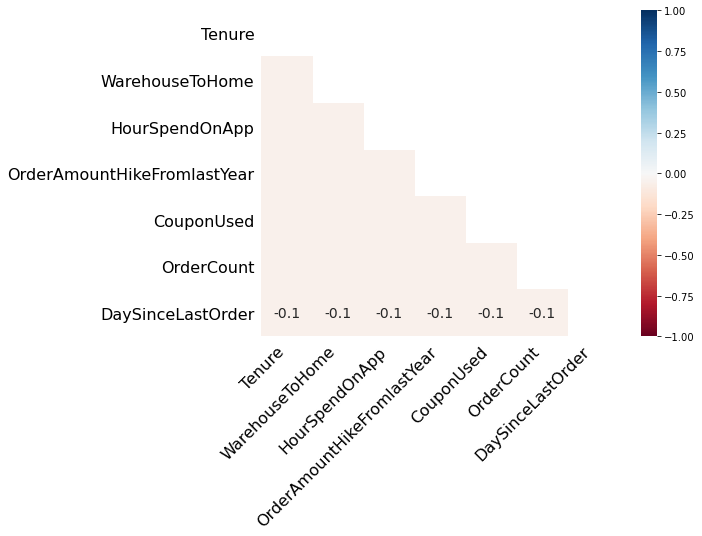

In [11]:
msno.heatmap(data,figsize=(8,6))
plt.show()

### Handling the missing values
Since the missingness is **MAR**, and the missing values are much, I will impute the missing values instead of dropping the missing value rows or columns.\
For imputing the missing values, I will use the fancyimpute library, and try out different methods of imputation to find the one that gives the best for the model prediction. The imputation will be done in the model building notebook